<a href="https://colab.research.google.com/github/matthewbegun/MXN500/blob/main/MXN500_2024_LEC_09_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# set up environment - this time with 100% more pacman!
install.packages("pacman")
pacman::p_load(tidyverse, broom, alr4) # note `alr4` is a long install...


In [ ]:
# ggplot options
# options(repr.plot.width=6, repr.plot.height=2) # for docx
options(repr.plot.width=12, repr.plot.height=6) # for html

### Prediction (3 of 3)
- Fit a linear regression model to the inbuilt iris data set using petal length as the explanatory variable and petal width as the outcome variable.
- How wide is a petal that is 7cm long?


In [ ]:
# Fit linear model:
iris_lm <- lm(data=iris, Petal.Width ~ Petal.Length)

In [ ]:
# How wide is a petal that is 7cm long?
# Check from the data set directly:
filter(iris, Petal.Length == 7)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>


In [ ]:
# No results, so let's predict instead!
iris_newdata <- data.frame(Petal.Length = 7)
predict(object = iris_lm, newdata = iris_newdata)

1 
2.547212

`geom_smooth()` using formula = 'y ~ x'


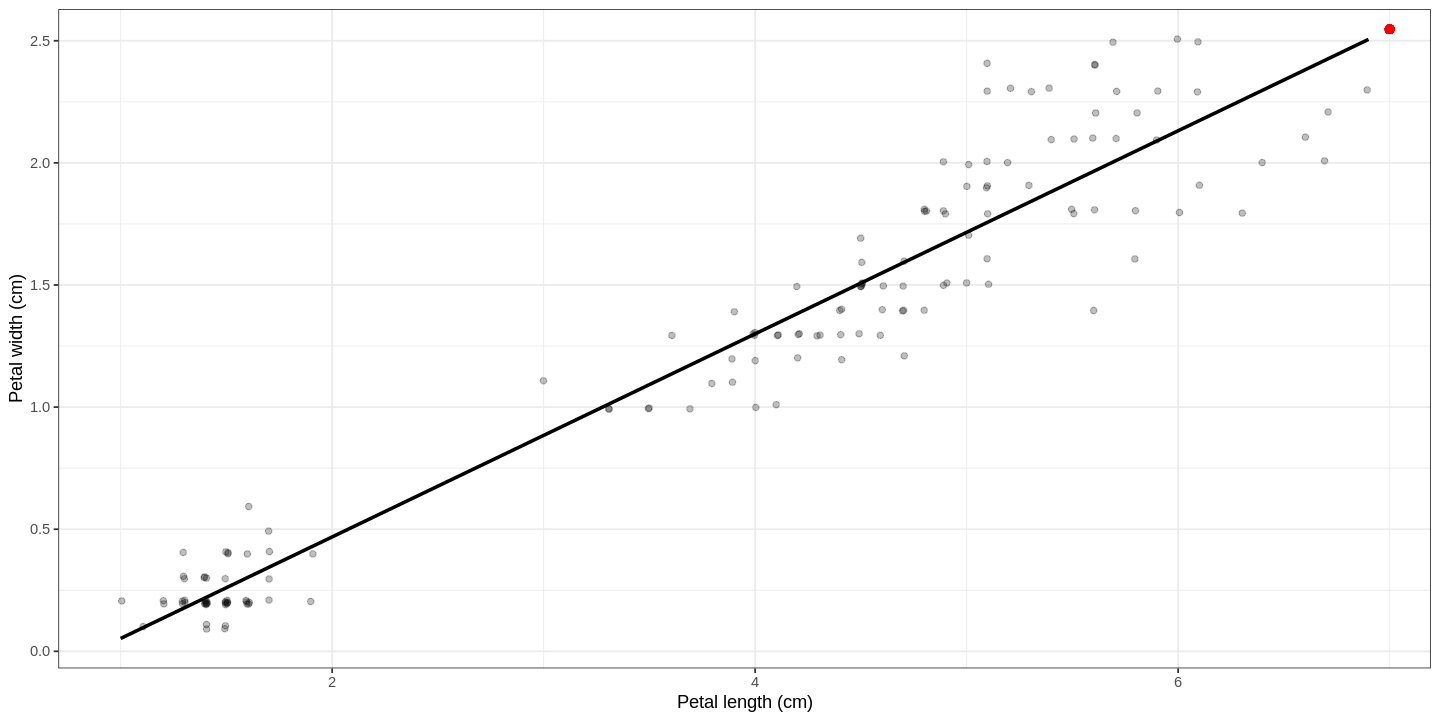

In [ ]:
# Produce a visual of the data and our new point:
ggplot(data=iris, aes(x=Petal.Length, y=Petal.Width)) +
  geom_point(position=position_jitter(h=0.01, w=0.01),
             alpha=0.25) +
  xlab("Petal length (cm)") +
  ylab("Petal width (cm)") +
  theme_bw() +
  geom_smooth(method="lm", se=F, col="black", alpha=0.25) +
  geom_point(x=7,
             y=predict(object = iris_lm, newdata = iris_newdata),
             pch=19, size=2, color="red")



### Prediction Intervals (3 of 3)
- Building on the previous result, what do we expect future petal width observations to look like?
- Visualise this using prediction intervals in R.


In [ ]:
# Create a set of new observations:
iris_newdata <- data.frame(Petal.Length = seq(1,7, by=0.1))
head(iris_newdata)
tail(iris_newdata)

,Petal.Length
,<dbl>
1,1.0
2,1.1
3,1.2
4,1.3
5,1.4
6,1.5


,Petal.Length
,<dbl>
56,6.5
57,6.6
58,6.7
59,6.8
60,6.9
61,7.0


In [ ]:
# Create a data frame of predicted values with prediction intervals:
iris_predictions <- data.frame(predict(object = iris_lm,
                                       newdata = iris_newdata,
                                       interval="prediction",
                                       level = 0.95))

# Combine data sets for visualisation:
iris_predictions <- bind_cols(iris_newdata, iris_predictions) # this is like c_bind()
head(iris_predictions)

,Petal.Length,fit,lwr,upr
,<dbl>,<dbl>,<dbl>,<dbl>
1,1.0,0.05267990,-0.3600340,0.4653938
2,1.1,0.09425544,-0.3182232,0.5067340
3,1.2,0.13583098,-0.2764208,0.5480828
4,1.3,0.17740652,-0.2346271,0.5894401
5,1.4,0.21898206,-0.1928419,0.6308061
6,1.5,0.26055760,-0.1510654,0.6721806


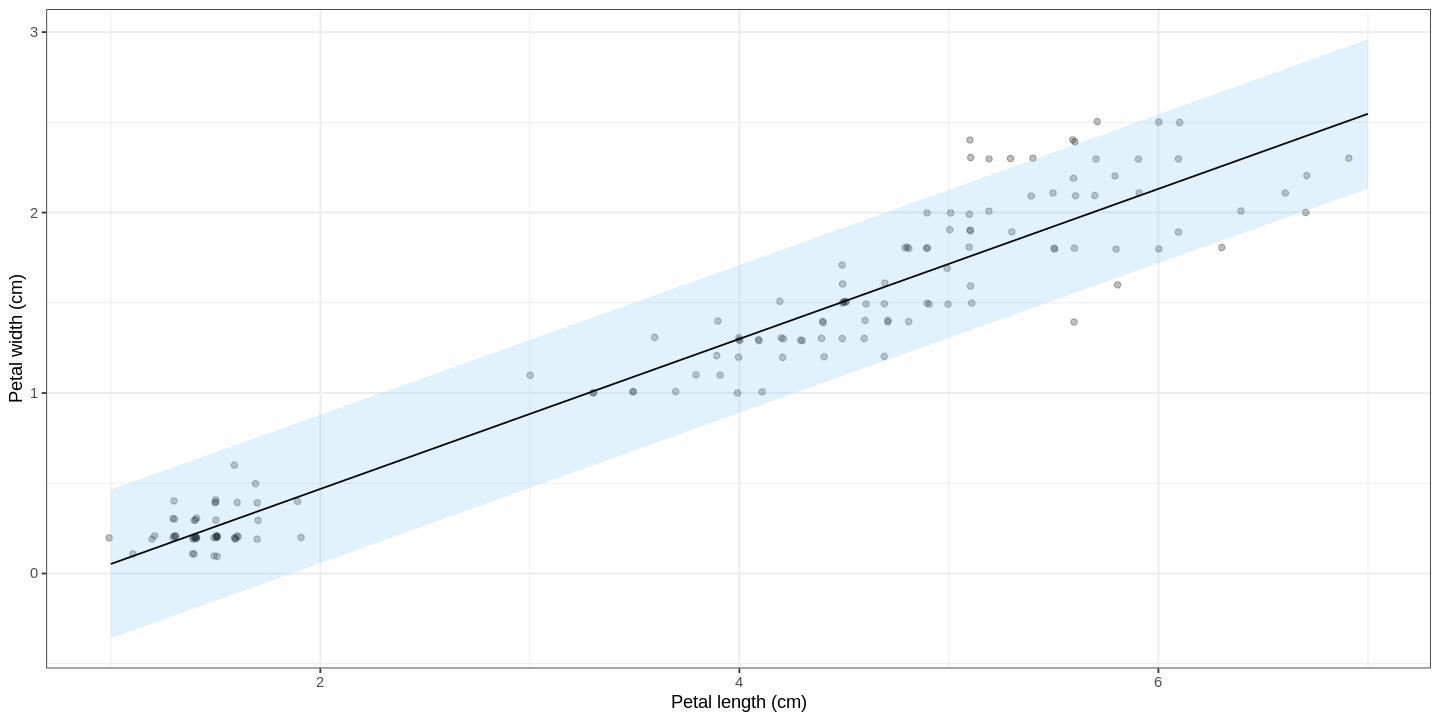

In [ ]:
# Create our visual:
ggplot(data=iris, aes(x=Petal.Length)) +
  geom_point(aes(y=Petal.Width),
             position=position_jitter(w=0.01, h=0.01), alpha=0.25) +
  xlab("Petal length (cm)") +
  ylab("Petal width (cm)") +
  theme_bw() +
  geom_ribbon(data=iris_predictions,
              aes(ymin=lwr, ymax=upr), fill="lightskyblue", color=NA, alpha=0.25) +
  geom_line(data=iris_predictions,
            aes(y=fit))



In [ ]:
# This might look flat, but let's compare the differences between our upper and
# lower bounds.
iris_predictions$upr-iris_predictions$lwr

[1] 0.8254279 0.8249572 0.8245036 0.8240672 0.8236480 0.8232460 0.8228612
 [8] 0.8224937 0.8221435 0.8218105 0.8214949 0.8211967 0.8209158 0.8206522
[15] 0.8204061 0.8201774 0.8199661 0.8197723 0.8195959 0.8194370 0.8192956
[22] 0.8191716 0.8190651 0.8189762 0.8189047 0.8188508 0.8188143 0.8187954
[29] 0.8187940 0.8188101 0.8188438 0.8188949 0.8189636 0.8190497 0.8191534
[36] 0.8192745 0.8194132 0.8195693 0.8197429 0.8199339 0.8201424 0.8203683
[43] 0.8206117 0.8208724 0.8211505 0.8214460 0.8217589 0.8220890 0.8224365
[50] 0.8228013 0.8231833 0.8235825 0.8239990 0.8244327 0.8248835 0.8253514
[57] 0.8258365 0.8263386 0.8268578 0.8273939 0.8279471

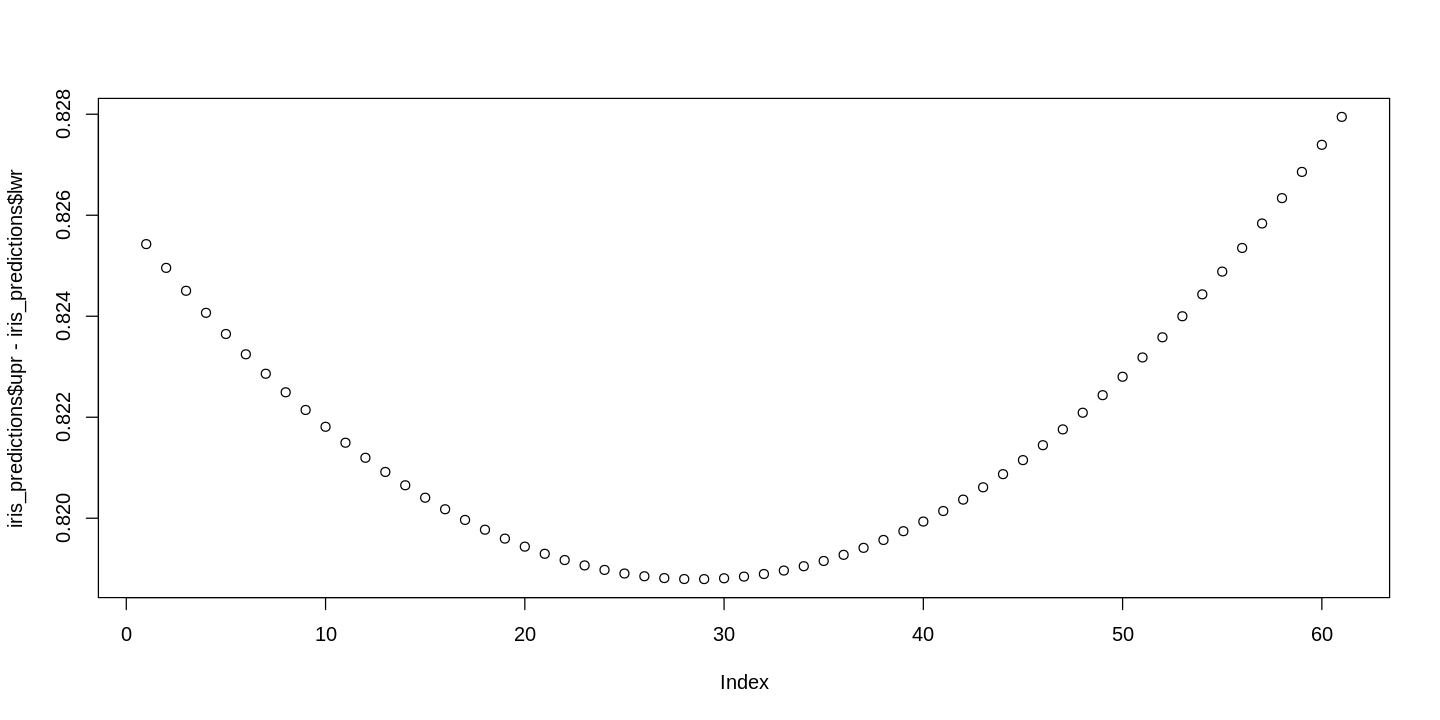

In [ ]:
# Simple plot using base R's plot() function.
plot(iris_predictions$upr-iris_predictions$lwr)

In [ ]:
# As expected, values of x var away from the mean of our observed x have wider
# prediction intervals.


### Confidence vs Prediction Intervals
- Where do we expect future means to lie?
- I.e., where do we expect future lines of best fit to fall?


In [ ]:
# Use the same predict function, with confidence interval instead of prediction.
iris_conf <- data.frame(predict(object = iris_lm,
                                newdata = iris_newdata,
                                interval="confidence",
                                level = 0.95))

# Combine data with "new data" for visualisation:
iris_conf <- bind_cols(iris_newdata, iris_conf)
head(iris_conf)



,Petal.Length,fit,lwr,upr
,<dbl>,<dbl>,<dbl>,<dbl>
1,1.0,0.05267990,-0.009267579,0.1146274
2,1.1,0.09425544,0.033895801,0.1546151
3,1.2,0.13583098,0.077041072,0.1946209
4,1.3,0.17740652,0.120166743,0.2346463
5,1.4,0.21898206,0.163271179,0.2746929
6,1.5,0.26055760,0.206352581,0.3147626


In [ ]:
# Combine both prediction and confidence intervals for plotting:
iris_both <- list(Prediction = mutate(iris_predictions) ,
                  Confidence = mutate(iris_conf)) %>%
  bind_rows(.id="Interval") %>%
  mutate(Interval = fct_rev(Interval))
# iris_both

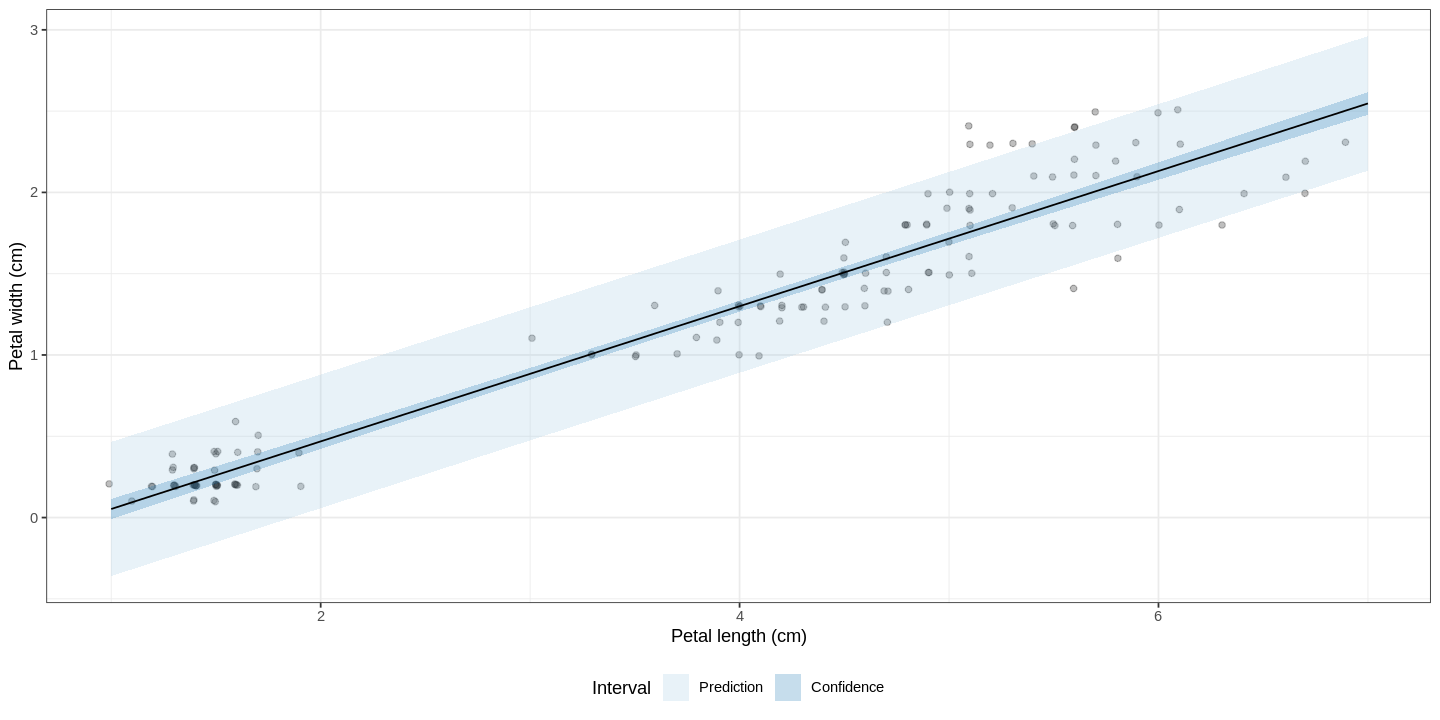

In [ ]:
# Similar visual as in slide 11:
ggplot(data=iris, aes(x=Petal.Length)) +
  geom_point(aes(y=Petal.Width),
             position=position_jitter(w=0.01, h=0.01), alpha=0.25) +
  xlab("Petal length (cm)") +
  ylab("Petal width (cm)") +
  theme_bw() +
  geom_ribbon(data=iris_both,
              aes(ymin=lwr, ymax=upr, fill=Interval),
              color=NA, alpha=0.25) +
  geom_line(data=iris_predictions, aes(y=fit)) +
  theme(legend.position="bottom") +
  scale_fill_brewer(palette="Paired")

### Polynomials (2 of 2)
Consider car stopping distance from the `alr4` library.
1. Fit a linear regression model to this data, using speed as the explanatory variable and distance as the outcome variable.
1. Check the assumptions of the model in Q1.
1. Fit a quadratic model to the data, this time using speed and speed squared as explanatory variables.
1. Check the assumptions of the model in Q3.


In [ ]:
# New data! This is car stopping distance data.
# install.packages("alr4")
# library(alr4)
data(stopping)

# Convert to Australian units.
stopping <- mutate(stopping,
                   Speed = Speed*1.60934, # mph to km/hr
                   Distance = Distance*0.3048) # ft to m
head(stopping)

,Speed,Distance
,<dbl>,<dbl>
1,6.43736,1.2192
2,8.04670,0.6096
3,8.04670,1.2192
4,8.04670,2.4384
5,8.04670,2.4384
6,11.26538,2.1336


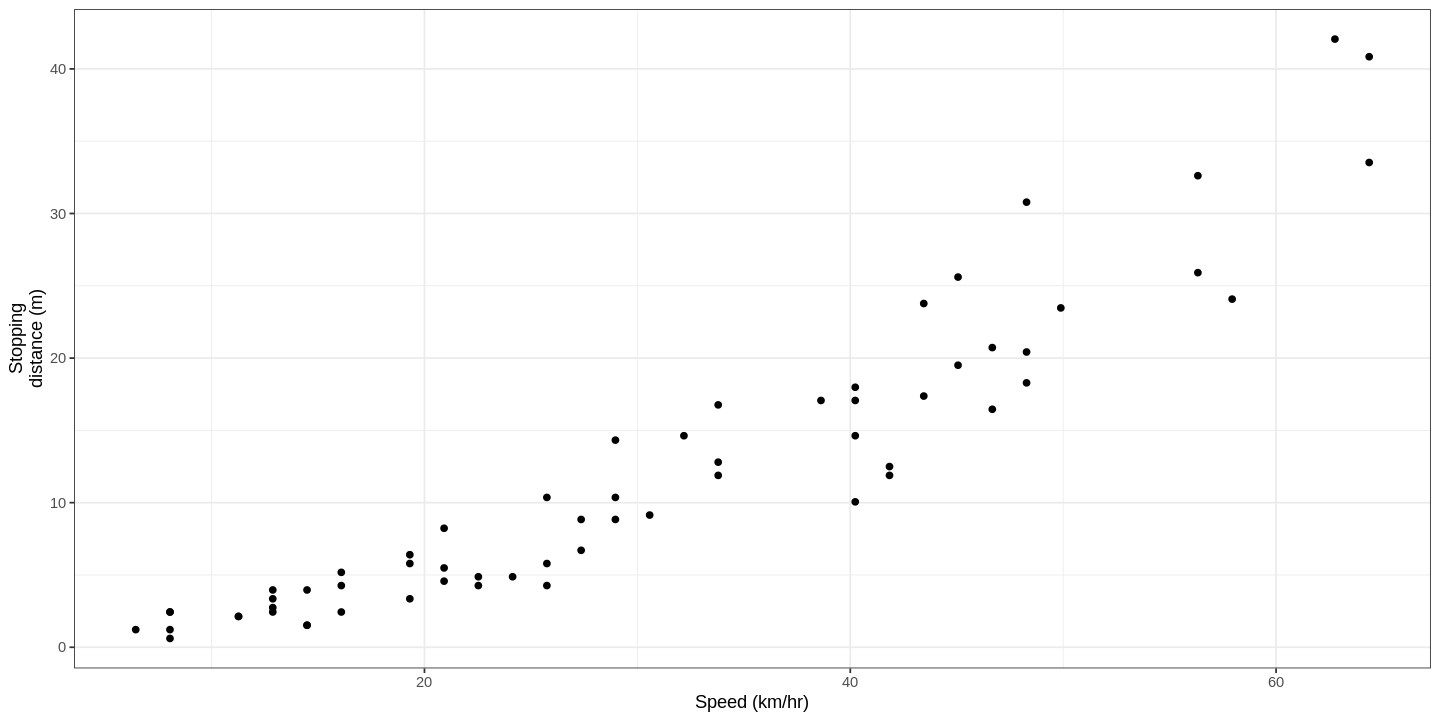

In [ ]:
# Quick visual:
ggplot(data=stopping, aes(x=Speed, y=Distance)) + theme_bw() +
  geom_point() + xlab("Speed (km/hr)") + ylab("Stopping\ndistance (m)")

In [ ]:
# Fit linear model:
cars_linear <- lm(data=stopping, Distance ~ Speed)
summary(cars_linear)


Call:
lm(formula = Distance ~ Speed, data = stopping)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7448 -2.2382 -0.4067  1.8066 10.8533 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.13591    0.98476  -6.231 5.04e-08 ***
Speed        0.59500    0.02867  20.751  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.587 on 60 degrees of freedom
Multiple R-squared:  0.8777,	Adjusted R-squared:  0.8757 
F-statistic: 430.6 on 1 and 60 DF,  p-value: < 2.2e-16


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


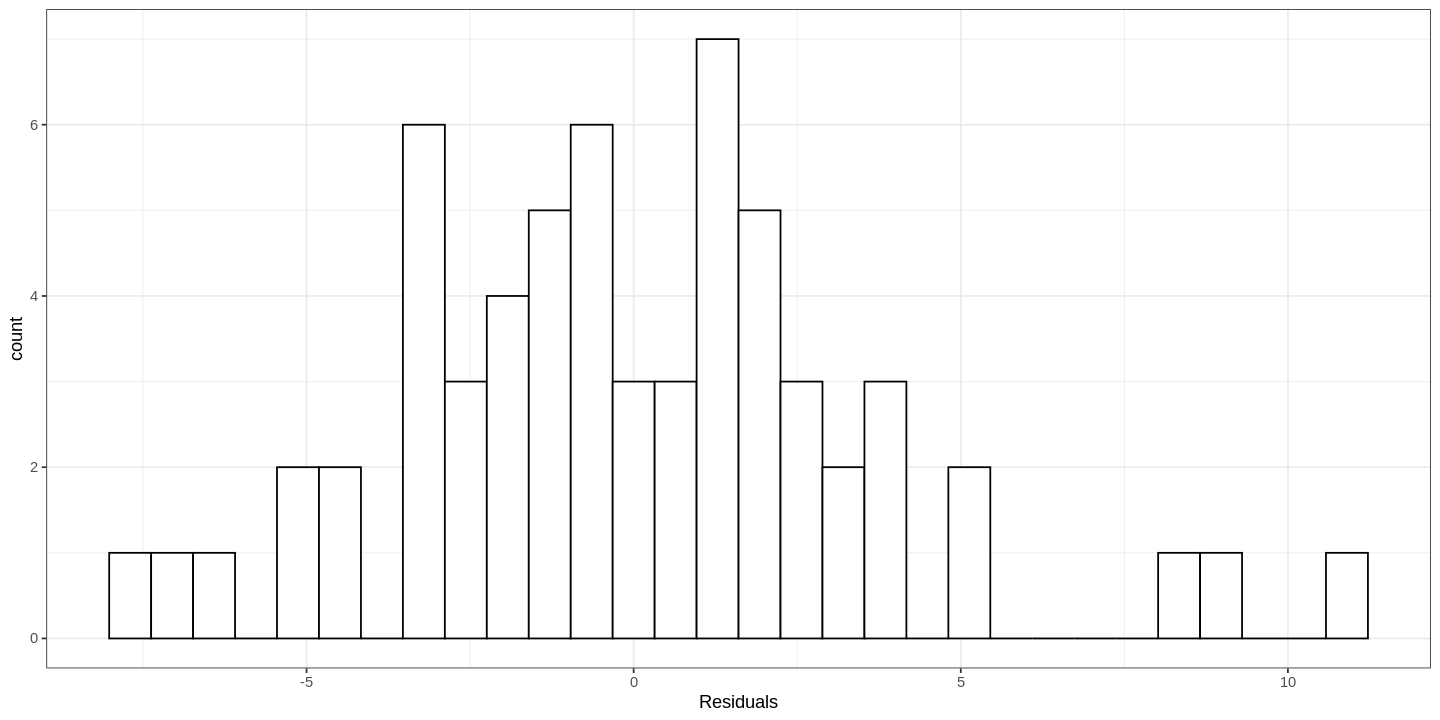

In [ ]:
# High R-squared and significant effect of speed.

# Check assumptions:
fortify_linear <- fortify(cars_linear)

# Normality (histogram):
ggplot(data=fortify_linear, aes(x=.resid)) +
  geom_histogram(center=0,
                 color="black", fill="white") + theme_bw() + xlab("Residuals")

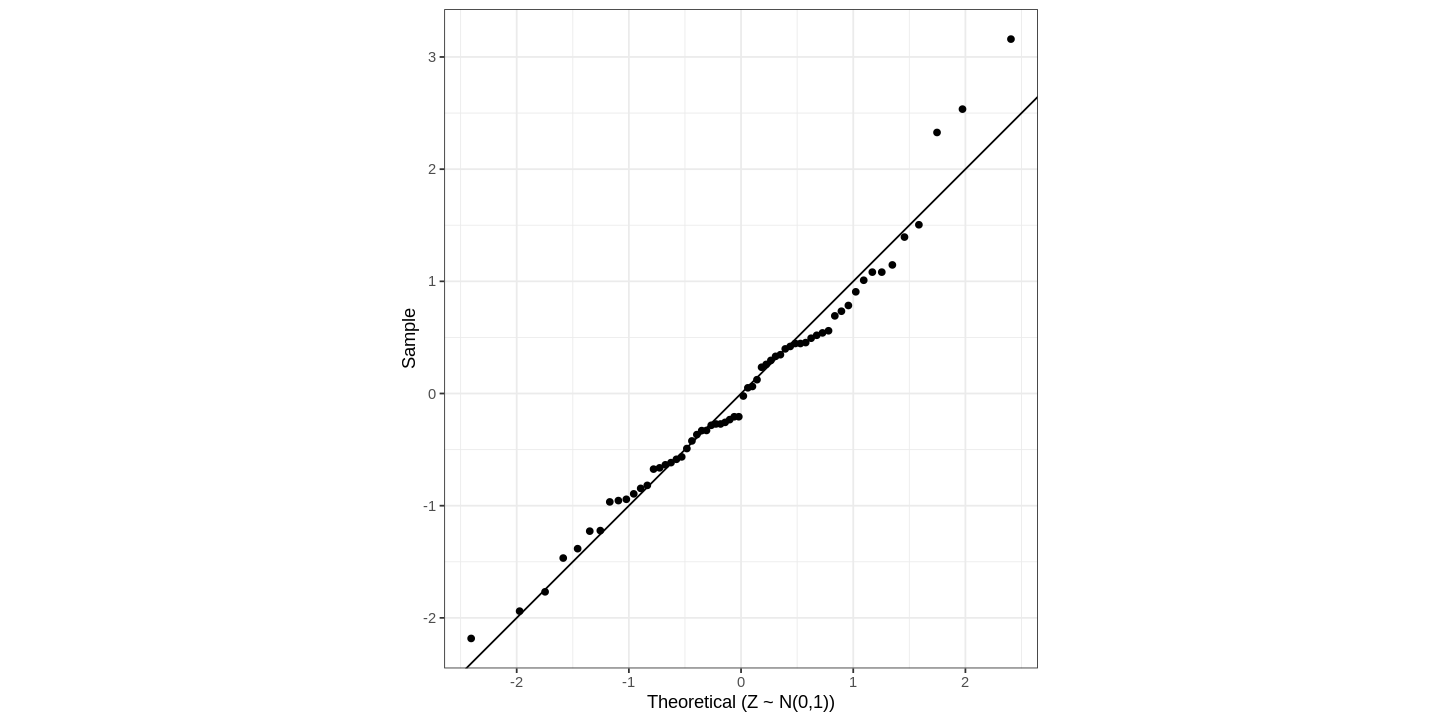

In [ ]:
# Normality (QQ-plot):
ggplot(data=fortify_linear, aes(sample=.stdresid)) +
  stat_qq(geom="point") + geom_abline() +
  xlab("Theoretical (Z ~ N(0,1))") +
  ylab("Sample") + coord_equal() + theme_bw()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


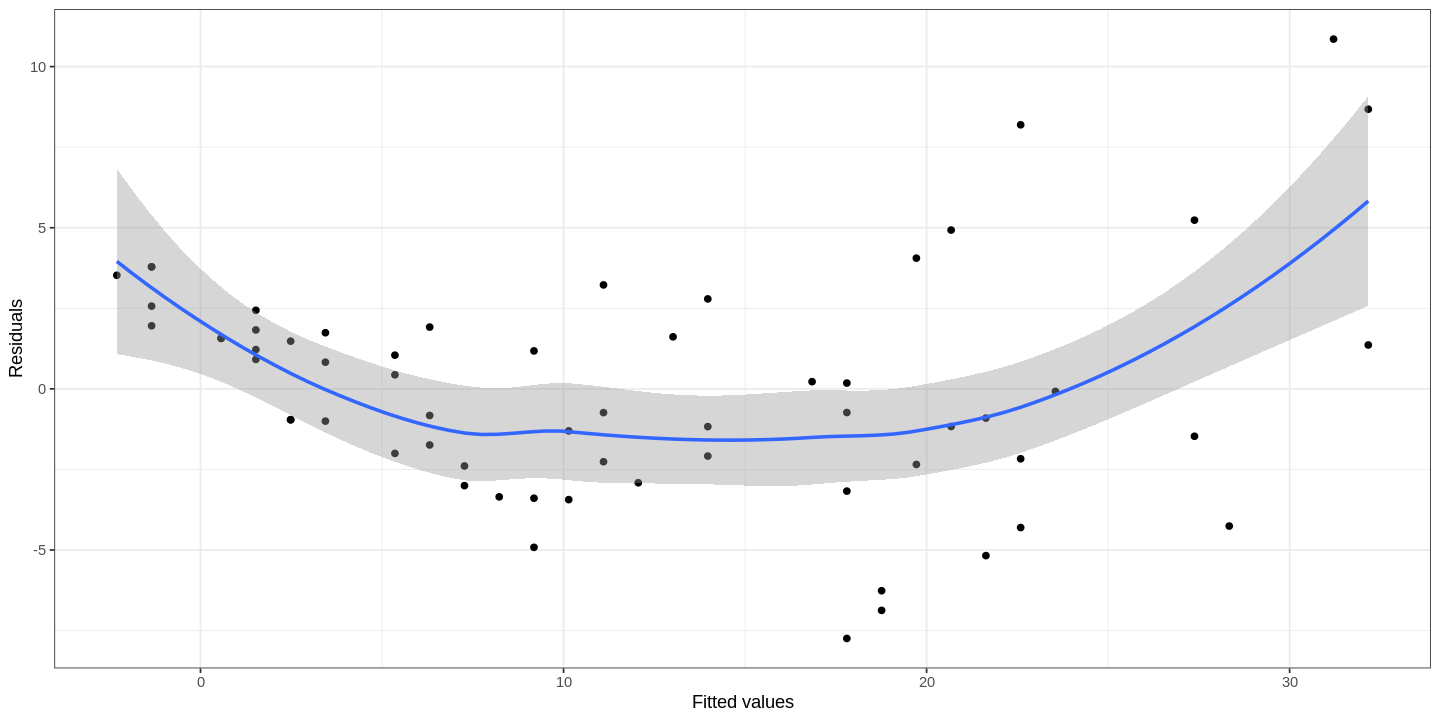

In [ ]:
# Non-homogeneity of errors (residuals vs fitted values):
ggplot(data=fortify_linear, aes(x=.fitted, y=.resid)) +
  geom_point() + theme_bw() + xlab("Fitted values") +
  ylab("Residuals") + geom_smooth()

In [ ]:
# Definite trend in these residuals.
# Fit a polynomial regression:
cars_quadratic <- lm(data=stopping, Distance ~ poly(Speed, 2, raw=T))
summary(cars_quadratic)


Call:
lm(formula = Distance ~ poly(Speed, 2, raw = T), data = stopping)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8639 -1.6620 -0.1682  1.1717  8.5153 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              0.481695   1.555292   0.310    0.758    
poly(Speed, 2, raw = T)1 0.078801   0.105381   0.748    0.458    
poly(Speed, 2, raw = T)2 0.007715   0.001533   5.033 4.83e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.026 on 59 degrees of freedom
Multiple R-squared:  0.9144,	Adjusted R-squared:  0.9115 
F-statistic: 315.3 on 2 and 59 DF,  p-value: < 2.2e-16


In [ ]:
# The lack of independence of a variable and its square means that they are a
# "double act", i.e., you can't ignore one if you fit both.
# Therefore, the interpretation from this model is that the R-squared is higher
# and that the quadratic speed term is significant.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


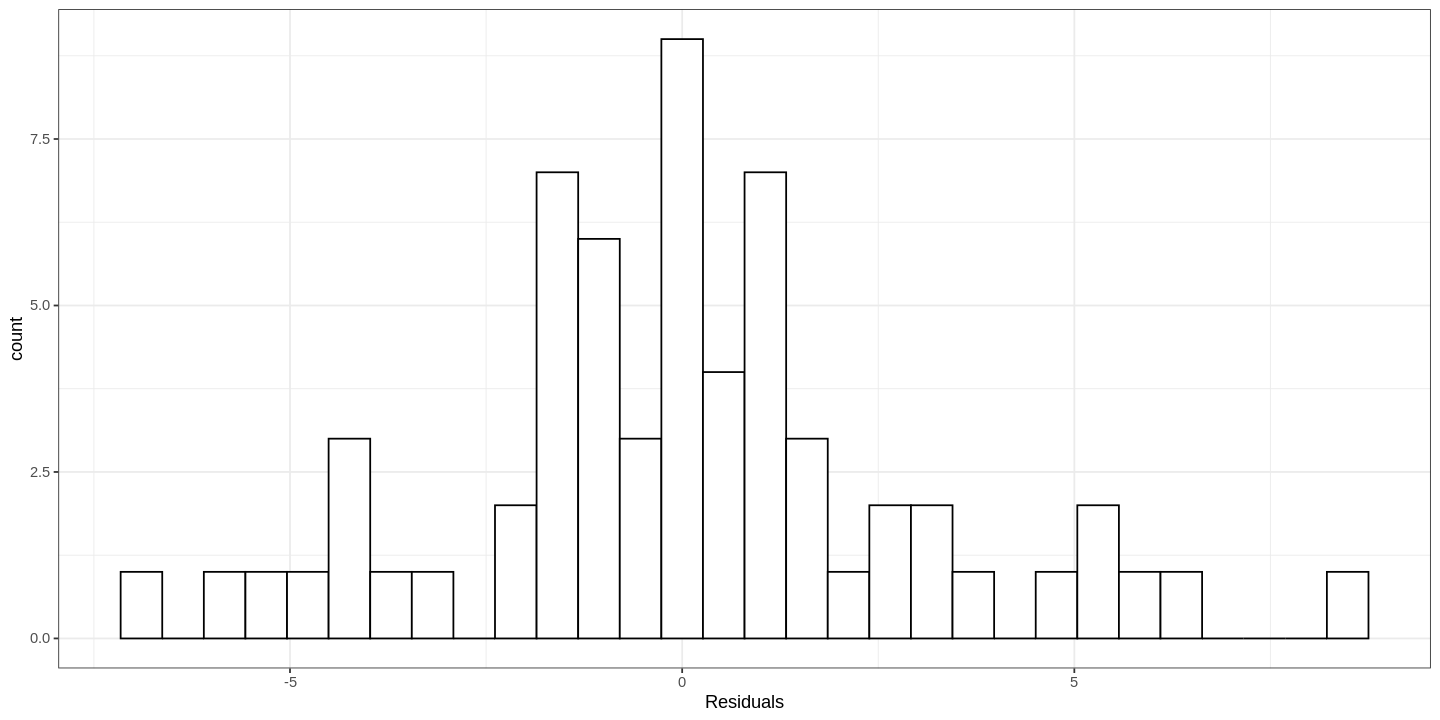

In [ ]:
# Check assumptions:
fortify_quadratic <- fortify(cars_quadratic)

# Normality (histogram):
ggplot(data=fortify_quadratic, aes(x=.resid)) +
  geom_histogram(center=0,
                 color="black", fill="white") + theme_bw() + xlab("Residuals")

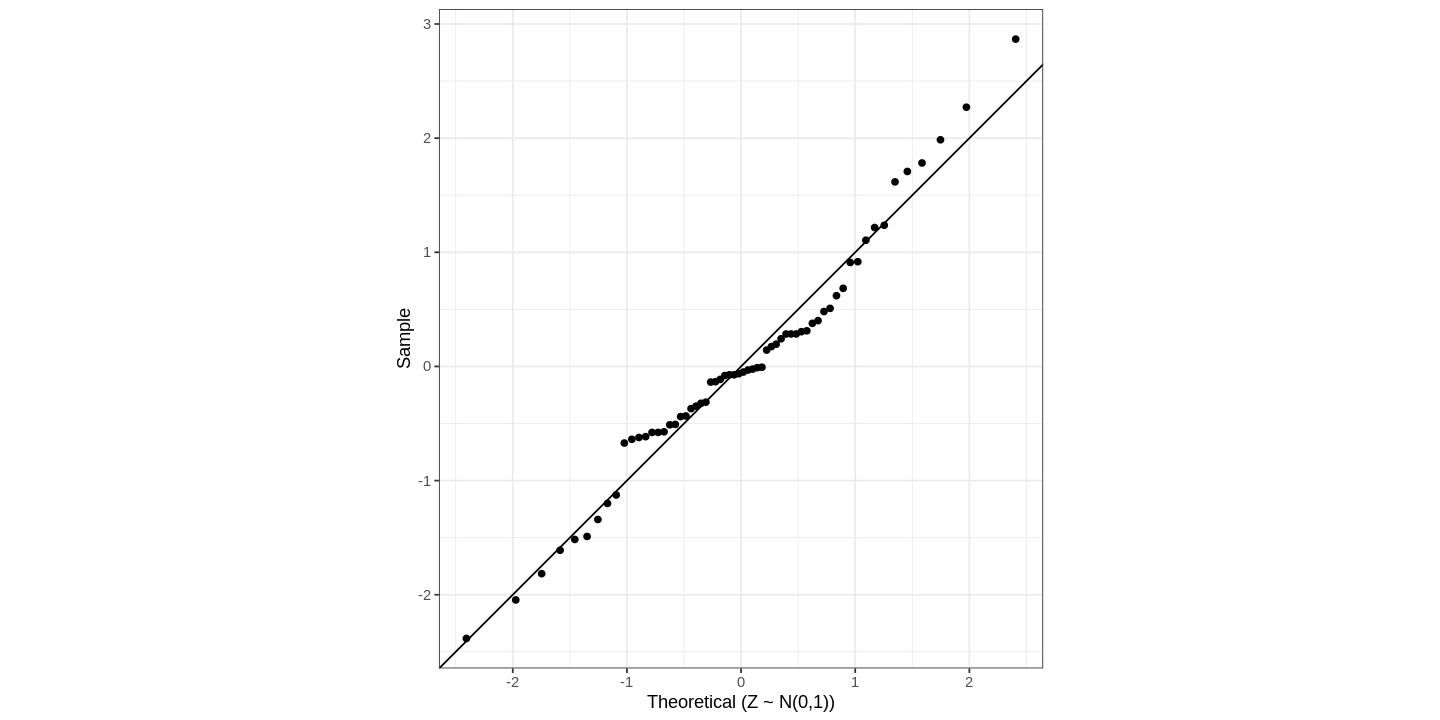

In [ ]:
# Normality (QQ-plot):
ggplot(data=fortify_quadratic, aes(sample=.stdresid)) +
  stat_qq(geom="point") + geom_abline() +
  xlab("Theoretical (Z ~ N(0,1))") +
  ylab("Sample") + coord_equal() + theme_bw()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


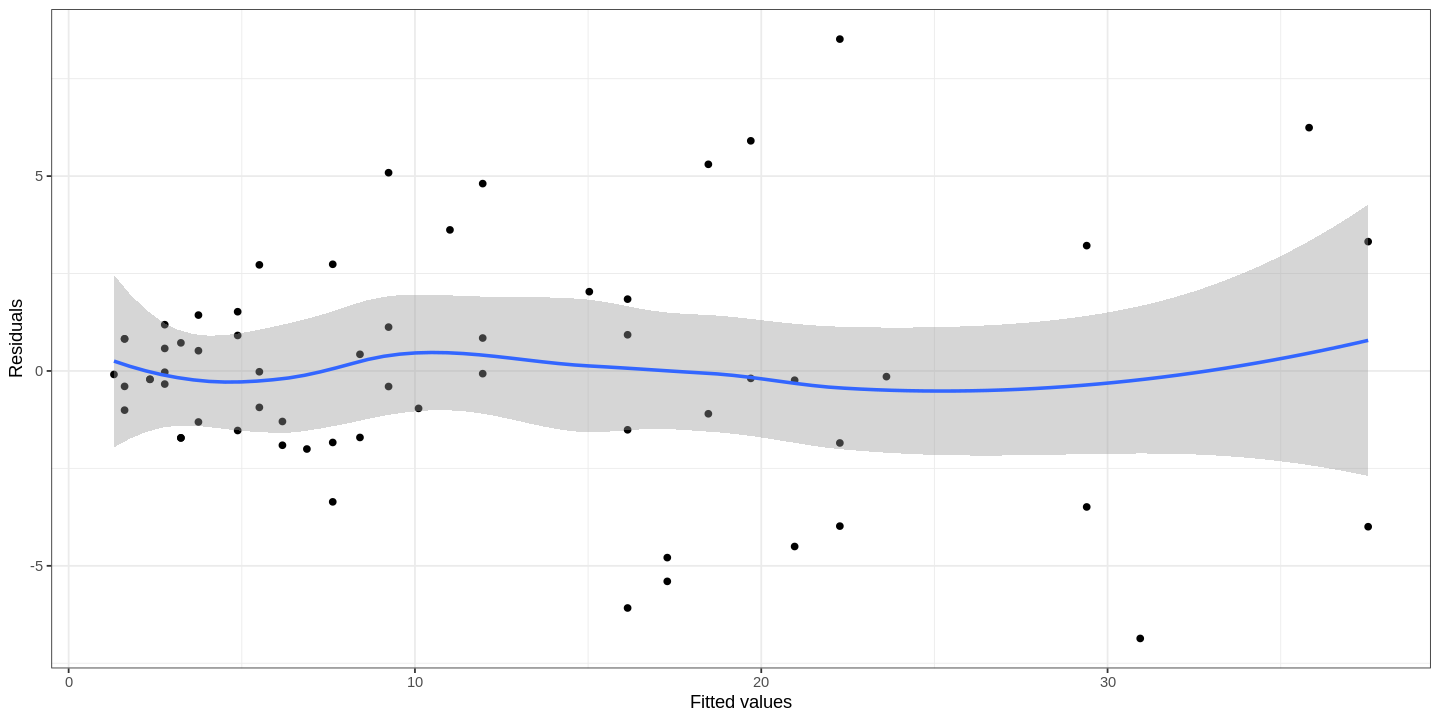

In [ ]:
# Non-homogeneity of errors (residuals vs fitted values):
ggplot(data=fortify_quadratic, aes(x=.fitted, y=.resid)) +
  geom_point() + theme_bw() + xlab("Fitted values") +
  ylab("Residuals") + geom_smooth()

In [ ]:
# Visualise difference between models:
# new data for predictions:
cars_newdata <- data.frame(Speed = seq(0, 80))

In [ ]:
# Prediction interval calculations:
both_preds <- list(Linear = cars_linear,
                   Quadratic = cars_quadratic) %>%
  map(~predict(object = .x, newdata=cars_newdata, interval="prediction" )) %>%
  map_df(~cbind(.x, cars_newdata), .id="Model") %>%
  rename(Distance = fit)

head(both_preds)

,Model,Distance,lwr,upr,Speed
,<chr>,<dbl>,<dbl>,<dbl>,<int>
1...1,Linear,-6.135910,-13.57666,1.304843,0
2...2,Linear,-5.540905,-12.96841,1.886596,1
3...3,Linear,-4.945900,-12.36057,2.468768,2
4...4,Linear,-4.350895,-11.75315,3.051363,3
5...5,Linear,-3.755890,-11.14616,3.634382,4
6...6,Linear,-3.160885,-10.53960,4.217828,5


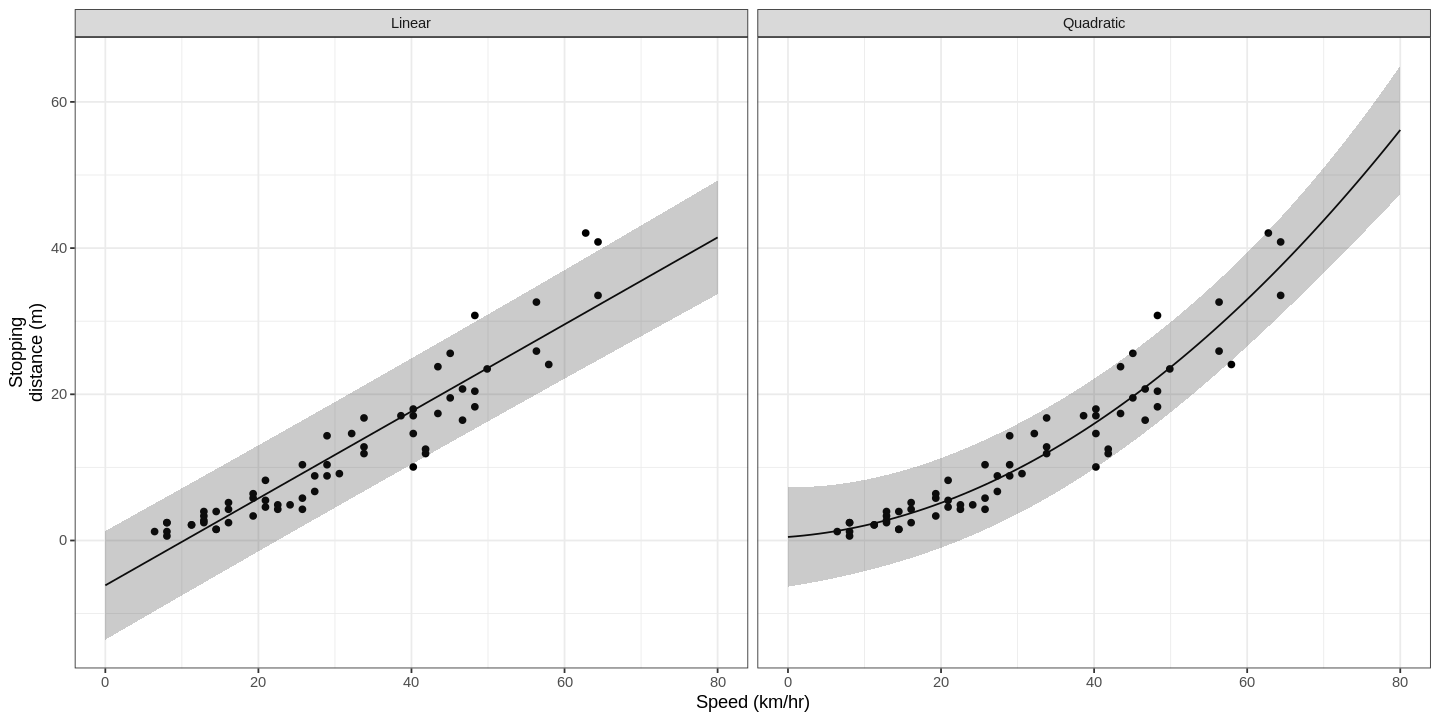

In [ ]:
# Visual:
ggplot(data=stopping, aes(x=Speed, y=Distance)) + theme_bw() +
  geom_point() + xlab("Speed (km/hr)") + ylab("Stopping\ndistance (m)") +
  geom_line(data=both_preds) +
  geom_ribbon(data=both_preds, aes(ymin=lwr, ymax=upr), alpha=0.25) +
  facet_wrap( ~ Model)

### Model Choice (2 of 2)
1. Calculate the test statistic for the F test between the models created.
1. Find the 𝑝 value and interpret the result.
1. Fit a cubic model and perform a comparison between this model and the best result from Q2.


In [ ]:
# Calculate sum of squared errors:
SSE_1 <- fortify_linear %>%
  summarise(SSE = sum(.resid^2)) %>%
  round(., 2)
SSE_1

SSE_2 <- fortify_quadratic %>%
  select(.resid) %>%
  summarise(SSE = sum(.resid^2)) %>%
  round(., 2)
SSE_2

SSE
<dbl>
772.04


SSE
<dbl>
540.15


In [ ]:
# Use glance() to find model degrees of freedom:
# library(broom)
nu_1 <- glance(cars_linear)$df.residual
nu_1
nu_2 <- glance(cars_quadratic)$df.residual
nu_2

[1] 60

[1] 59

In [ ]:
# Calculate the test statistic:
ts <- as.numeric(round((SSE_1 - SSE_2)/(nu_1 - nu_2)/(SSE_2/(nu_2)), 2))
ts

[1] 25.33

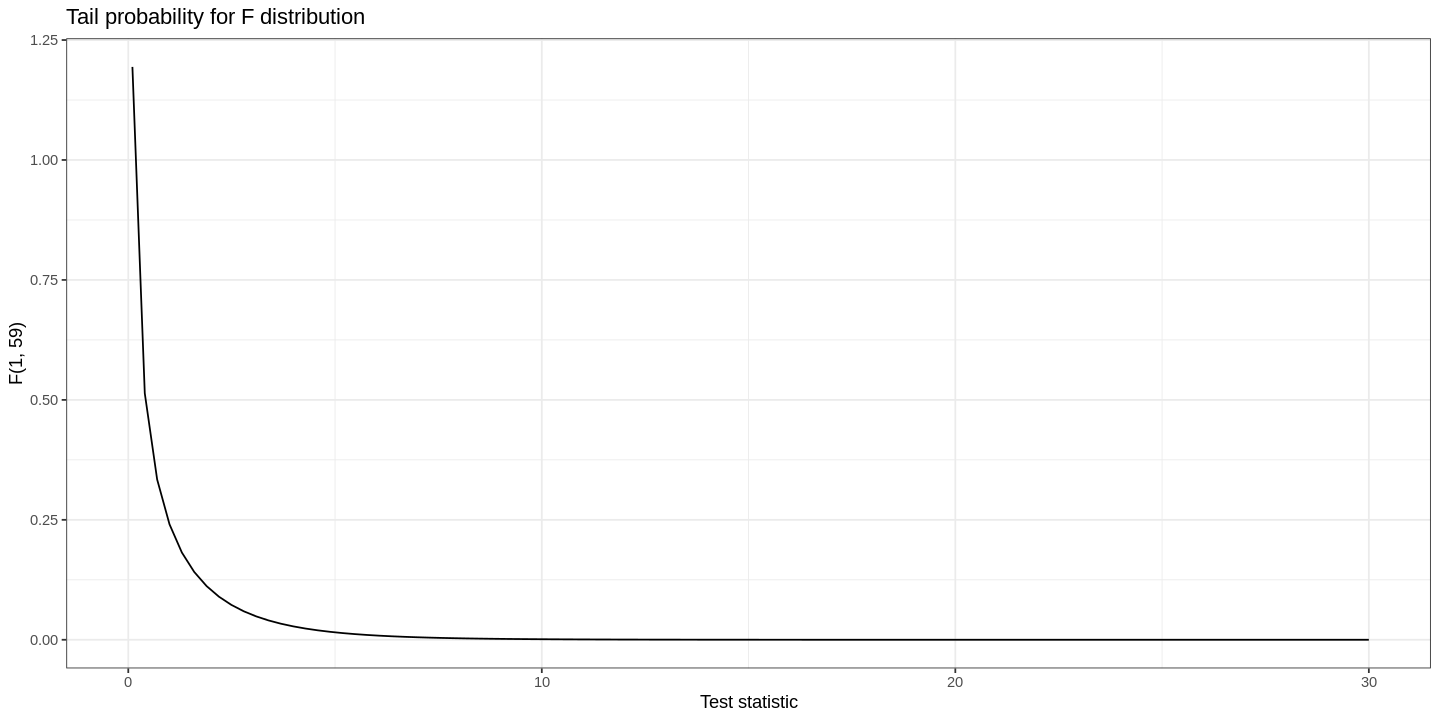

In [ ]:
# Compare to F distribution with parameters (1, 59):
ggplot(data=data.frame(x=c(0, 30)), aes(x=x)) +
  stat_function(fun=df, args=list(df1=nu_1 - nu_2, df2=nu_2),
                geom="line", xlim=c(0.1, 30)) +
  theme_bw() +
  xlim(c(0,30)) +
  xlab("Test statistic") + ylab(sprintf("F(%g, %g)" , nu_1 -nu_2, nu_2))  +
  ggtitle("Tail probability for F distribution")

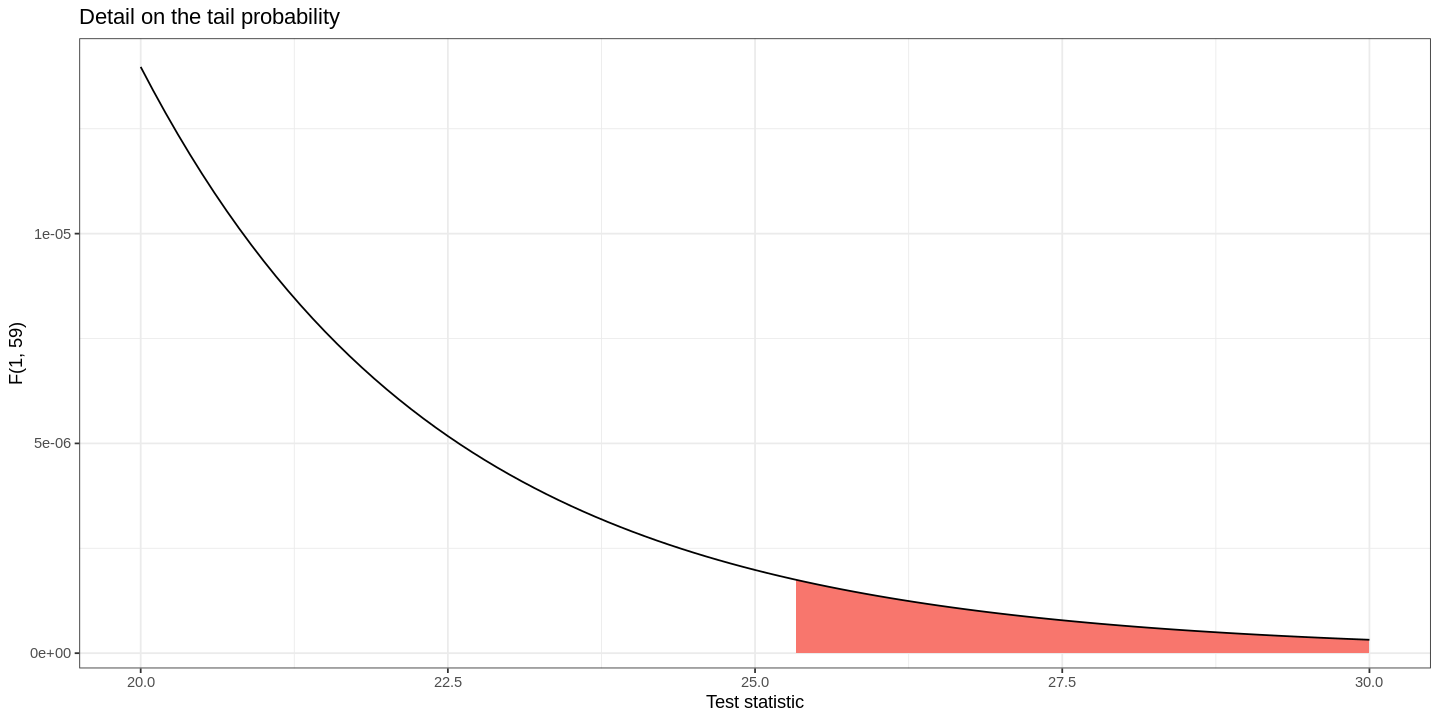

In [ ]:
# Visualising our statistic (25.33):
ggplot(data=data.frame(x=c(0, 30)), aes(x=x)) +
  stat_function(fun=df, args=list(df1=nu_1 - nu_2, df2=nu_2),
                geom="ribbon", ymin=0, aes(ymax=..y..), fill="#f8766d", xlim=c(ts,30)) +
  stat_function(fun=df, args=list(df1=nu_1 - nu_2, df2=nu_2),
                geom="line", xlim=c(20, 30)) +
  theme_bw() +
  xlim(c(20,30)) +
  xlab("Test statistic") + ylab(sprintf("F(%g, %g)" , nu_1 -nu_2, nu_2))  +
  ggtitle("Detail on the tail probability")

In [ ]:
# p value calculation is as simple as the others:
pf(q=ts, df1=nu_1 - nu_2, df2=nu_2, lower.tail=F)

[1] 4.833178e-06

In [ ]:
# H_0 implies no difference between models.
# We have significant evidence to reject H_0.
# Therefore, the quadratic model is a better fit to the data compared to the
# linear model.

# Summary of our best model:
cars_quadratic_coef <- coef(cars_quadratic) %>% round(., 3)
cars_quadratic_coef

(Intercept) poly(Speed, 2, raw = T)1 poly(Speed, 2, raw = T)2 
                   0.482                    0.079                    0.008

$y_i = 0.482 + 0.079x_i + 0.008x_i^2$

In [ ]:
# So we have y_hat_i = 0.482 + 0.079x_i + 0.008x_i^2

# Or, use in-built function, anova():
anova(cars_linear, cars_quadratic)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,60,772.0397,NA,NA,NA,NA
2,59,540.1504,1,231.8893,25.32901,4.834919e-06


In [ ]:
# What about a cubic model?
cars_cubic <- lm(data=stopping, Distance ~ poly(Speed, 3, raw=T))
summary(cars_cubic) # R-squared of 0.9147, but concerning significance!
summary(cars_quadratic) # R-squared of 0.9144


Call:
lm(formula = Distance ~ poly(Speed, 3, raw = T), data = stopping)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8524 -1.6815 -0.0636  1.1534  8.7187 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)
(Intercept)              -5.856e-01  2.899e+00  -0.202    0.841
poly(Speed, 3, raw = T)1  2.124e-01  3.233e-01   0.657    0.514
poly(Speed, 3, raw = T)2  3.292e-03  1.023e-02   0.322    0.749
poly(Speed, 3, raw = T)3  4.196e-05  9.592e-05   0.437    0.663

Residual standard error: 3.047 on 58 degrees of freedom
Multiple R-squared:  0.9147,	Adjusted R-squared:  0.9103 
F-statistic: 207.4 on 3 and 58 DF,  p-value: < 2.2e-16



Call:
lm(formula = Distance ~ poly(Speed, 2, raw = T), data = stopping)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8639 -1.6620 -0.1682  1.1717  8.5153 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              0.481695   1.555292   0.310    0.758    
poly(Speed, 2, raw = T)1 0.078801   0.105381   0.748    0.458    
poly(Speed, 2, raw = T)2 0.007715   0.001533   5.033 4.83e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.026 on 59 degrees of freedom
Multiple R-squared:  0.9144,	Adjusted R-squared:  0.9115 
F-statistic: 315.3 on 2 and 59 DF,  p-value: < 2.2e-16


In [ ]:
# Compare to our current best- is the increase in model complexity "worth it"?
anova(cars_quadratic, cars_cubic)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,59,540.1504,NA,NA,NA,NA
2,58,538.3740,1,1.776319,0.1913661,0.6634067


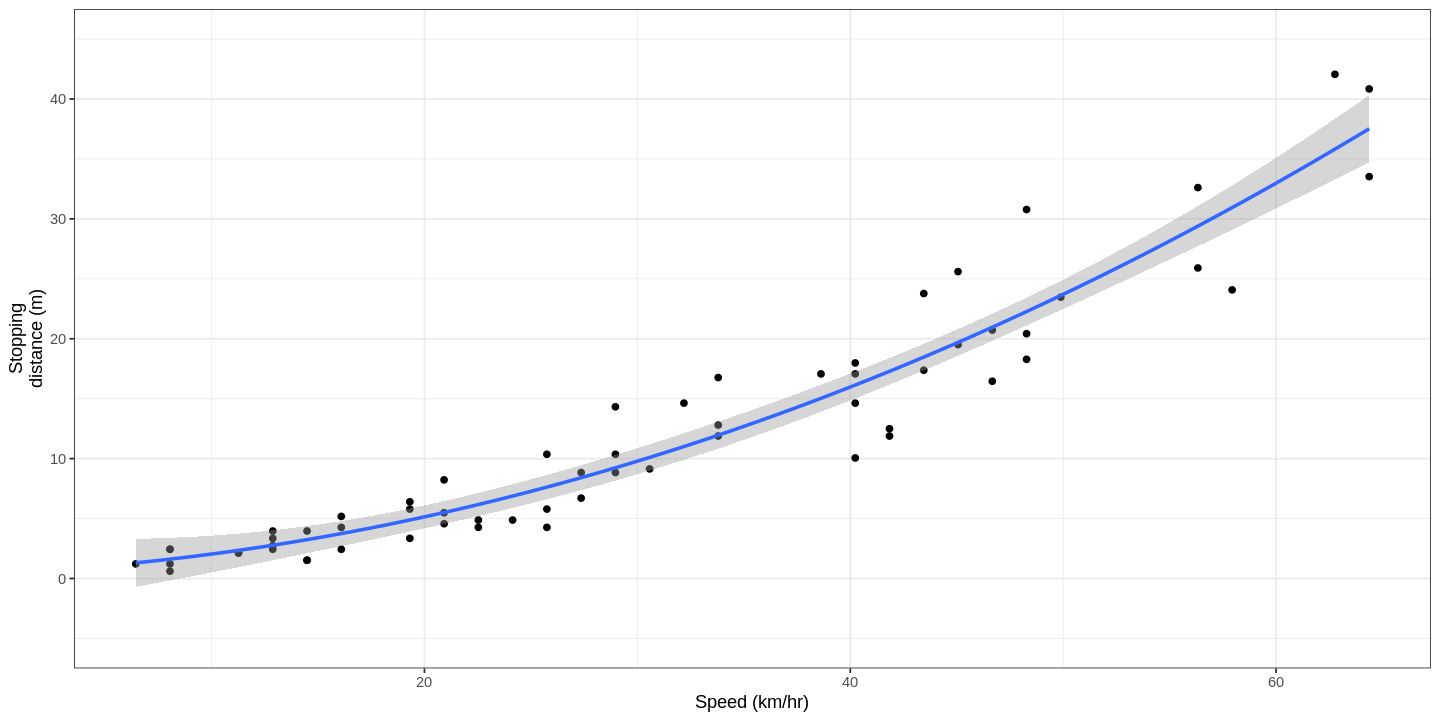

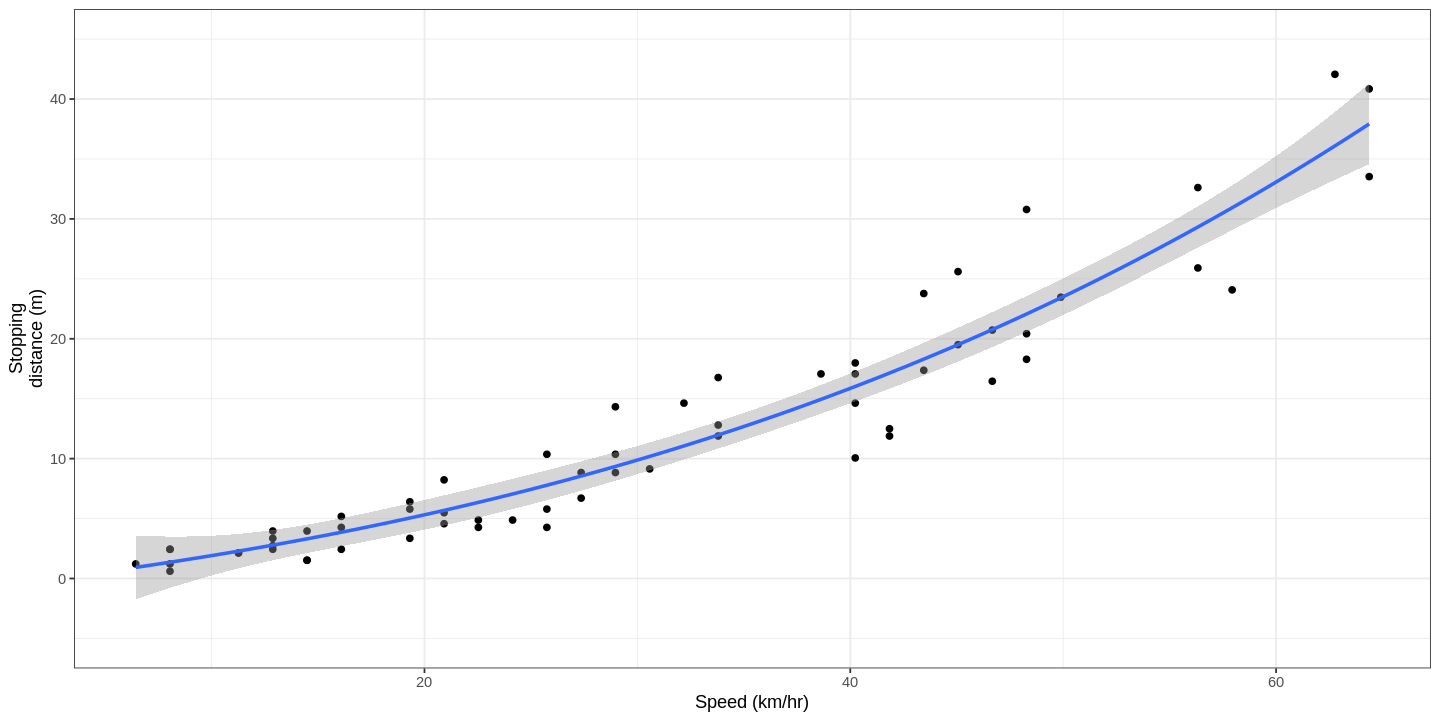

In [ ]:
# Based on our p value (0.6634) the amount of variation explained by the
# restricted model is equal to that explained by the full model.
# I.e., moving from quadratic to cubic isn't worth it, statistically.

# Quick visual comparison:
ggplot(data=stopping, aes(x=Speed, y=Distance)) + theme_bw() +
  geom_point() + xlab("Speed (km/hr)") + ylab("Stopping\ndistance (m)") +
  geom_smooth(method = "lm", formula = y ~ poly(x,2)) +
  ylim(-5,45)

ggplot(data=stopping, aes(x=Speed, y=Distance)) + theme_bw() +
  geom_point() + xlab("Speed (km/hr)") + ylab("Stopping\ndistance (m)") +
  geom_smooth(method = "lm", formula = y ~ poly(x,3)) +
  ylim(-5,45)

In [ ]:
# Incredible how such a small change can create a model with no significant
# terms despite looking visually similar.